In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from urllib.request import urlopen

In [2]:
url='https://www.flipkart.com/dell-vostro-14-3000-core-i5-8th-gen-4-gb-1-tb-hdd-linux-2-gb-graphics-3478-laptop/product-reviews/itmf4daar3urw6yr?pid=COMF4DAAMGHXCHXH'
u=urlopen(url)
page=u.read()
s=BeautifulSoup(page,'html.parser')
contain=s.findAll("div",{"class":"_1HmYoV _35HD7C col-9-12"})
len(contain)

1

In [3]:
print(BeautifulSoup.prettify(contain[0]))

<div class="_1HmYoV _35HD7C col-9-12">
 <div class="_1HmYoV _35HD7C col-12-12" style="border-bottom:1px solid #f0f0f0">
  <div class="_1HmYoV hCUpcT col-12-12">
   <div class="bhgxx2 col-10-12">
    <div class="o9Xx3p _1_odLJ">
     Dell Vostro 14 3000 Core i5 8th Gen - (4 GB/1 TB HDD/Linux/2 GB Graphics) 3478 Laptop Reviews
    </div>
   </div>
   <div class="bhgxx2" style="flex-grow:1;overflow:initital">
    <div class="YW_iw_">
     <div class="_2Qqkfm">
      <div class="_15DXNf">
       <div class="_2uWdcR _6wb6nn">
        <select class="_3092M2 _6wb6nn" name="sortFilter">
         <option selected="" value="MOST_HELPFUL">
          Most Helpful
         </option>
         <option value="MOST_RECENT">
          Most Recent
         </option>
         <option value="POSITIVE_FIRST">
          Positive First
         </option>
         <option value="NEGATIVE_FIRST">
          Negative First
         </option>
        </select>
        <span class="_1LBnEa _1hhE4x">
        </span>

In [4]:
review = contain[0].findAll("div",{"class":"row"})
tex=[]
for i in range(5,50,5):
    t=review[i].text
    tex.append(t)
tex   

['Review after a monthFirst few days ive used ubuntu,later upgraded to windows 10pro.Detailed review1.DisplayFor normal usage,coding movies,ive reduced the graphics level in both amd and intel settings to the lowest,which gave me a brilliant result(more than my expectations).With 40% brightness battery lasted for 6.5hrs from 100%-8%For gaming, if you change the settings to ultra level,its great.GTA V ran almost smoothly,(compared to my pc 4gb ram).2.processor.Adobe photoshop,premere ...READ MORE',
 'Writing the review after using for 1 month.1. Build quality if fine, the keyboard and touch pad are smooth but kind of gives this delicate, shaky feeling. Not a sturdy one.2. Battery life comes at around 6 hrs if normal browsing, other work is done. If watching videos then gives around 4 hrs. With 70% brightness.3. With windows 10 the disk usage was showing always 100 and laptop used to hang a lot. After tweaking setting and disabling some services now the performance is average. Think of .

In [6]:
text=pd.DataFrame()

In [7]:
text[['text']]=pd.DataFrame(tex)

In [8]:
text

,text
0,Review after a monthFirst few days ive used ub...
1,Writing the review after using for 1 month.1. ...
2,Nice laptop at 35K... Ubuntu is slow in this o...
3,"Poor performance of the, even though it has de..."
4,Value For Money ProductREAD MORE
5,GoodREAD MORE
6,Dell has given a very good product at this ave...
7,Solid Performance.READ MORE
8,Performance is not as per i5 processors.Need R...


In [9]:
#count Words
text['word_count'] = text['text'].apply(lambda x: len(str(x).split(" ")))
text[['text','word_count']].head()

,text,word_count
0,Review after a monthFirst few days ive used ub...,68
1,Writing the review after using for 1 month.1. ...,89
2,Nice laptop at 35K... Ubuntu is slow in this o...,55
3,"Poor performance of the, even though it has de...",37
4,Value For Money ProductREAD MORE,5


In [10]:
#count characters
text['char_count'] = text['text'].str.len()
text[['text','char_count']].head()

,text,char_count
0,Review after a monthFirst few days ive used ub...,498
1,Writing the review after using for 1 month.1. ...,506
2,Nice laptop at 35K... Ubuntu is slow in this o...,305
3,"Poor performance of the, even though it has de...",239
4,Value For Money ProductREAD MORE,32


In [11]:
#Average Word Length
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))
text['avg_word'] = text['text'].apply(lambda x: avg_word(x))
text[['text','avg_word']].head()

,text,avg_word
0,Review after a monthFirst few days ive used ub...,6.338235
1,Writing the review after using for 1 month.1. ...,4.696629
2,Nice laptop at 35K... Ubuntu is slow in this o...,4.563636
3,"Poor performance of the, even though it has de...",5.486486
4,Value For Money ProductREAD MORE,5.600000


In [12]:
#count of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['stopwords'] = text['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
text[['text','stopwords']].head()

,text,stopwords
0,Review after a monthFirst few days ive used ub...,22
1,Writing the review after using for 1 month.1. ...,27
2,Nice laptop at 35K... Ubuntu is slow in this o...,21
3,"Poor performance of the, even though it has de...",11
4,Value For Money ProductREAD MORE,0


In [13]:
#Removing Punctuation
text['text'] = text['text'].str.replace('[^\w\s]','')
text['text'].head()

0    Review after a monthFirst few days ive used ub...
1    Writing the review after using for 1 month1 Bu...
2    Nice laptop at 35K Ubuntu is slow in this one ...
3    Poor performance of the even though it has ded...
4                     Value For Money ProductREAD MORE
Name: text, dtype: object

In [14]:
#Removal of Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
text['text'].head()

0    Review monthFirst days ive used ubuntulater up...
1    Writing review using 1 month1 Build quality fi...
2    Nice laptop 35K Ubuntu slow one fingerprint do...
3    Poor performance even though dedicated GPU int...
4                     Value For Money ProductREAD MORE
Name: text, dtype: object

In [15]:
# tokenization and find the frequency

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
t=[]
for i in range(len(text['text'])):
    tokenized_text=sent_tokenize(text['text'][i])
    tokenized_word=word_tokenize(text['text'][i])
    t =t+tokenized_word
#print(t)
freq = pd.Series(' '.join(text['text']).split()).value_counts()[:10]
print(freq)
fdist = FreqDist(t)
print(fdist)


MORE           9
laptop         4
performance    4
fine           3
work           3
used           3
average        2
gives          2
windows        2
intel          2
dtype: int64
<FreqDist with 168 samples and 209 outcomes>


In [16]:
#plotting the frequency of words
import matplotlib.pyplot as plt

fdist.plot(25,cumulative=False)

plt.show()

<Figure size 640x480 with 1 Axes>

In [17]:
#Common word removal
#freq = list(freq.index)
text['text'] = text['text'].apply(lambda x: " ".join(x for x in x.split() if x not in 'MORE'))
text['text'].head()

0    Review monthFirst days ive used ubuntulater up...
1    Writing review using 1 month1 Build quality fi...
2    Nice laptop 35K Ubuntu slow one fingerprint do...
3    Poor performance even though dedicated GPU int...
4                          Value For Money ProductREAD
Name: text, dtype: object

In [18]:
#Rare words
freq = pd.Series(' '.join(text['text']).split()).value_counts()[-10:]
freq.head()

quality    1
i5         1
change     1
great      1
days       1
dtype: int64

In [19]:
#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
text['stem']= text['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
text.head()

,text,word_count,char_count,avg_word,stopwords,stem
0,Review monthFirst days ive used ubuntulater up...,68,498,6.338235,22,review monthfirst day ive use ubuntulat upgrad...
1,Writing review using 1 month1 Build quality fi...,89,506,4.696629,27,write review use 1 month1 build qualiti fine k...
2,Nice laptop 35K Ubuntu slow one fingerprint do...,55,305,4.563636,21,nice laptop 35k ubuntu slow one fingerprint do...
3,Poor performance even though dedicated GPU int...,37,239,5.486486,11,poor perform even though dedic gpu intel integ...
4,Value For Money ProductREAD,5,32,5.600000,0,valu for money productread


In [20]:
#Lemmatization
from textblob import Word
text['text']=text['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
text['text'].head()

0    Review monthFirst day ive used ubuntulater upg...
1    Writing review using 1 month1 Build quality fi...
2    Nice laptop 35K Ubuntu slow one fingerprint do...
3    Poor performance even though dedicated GPU int...
4                          Value For Money ProductREAD
Name: text, dtype: object

In [21]:
#Term frequency
tf1 = (text['text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

,words,tf
0,With,2
1,around,2
2,hr,2
3,give,2
4,Writing,1


In [22]:
#Inverse Document Frequency
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(text.shape[0]/(len(text[text['text'].str.contains(word)])))

tf1.head()

,words,tf,idf
0,With,2,1.504077
1,around,2,2.197225
2,hr,2,1.504077
3,give,2,1.504077
4,Writing,1,2.197225


In [23]:
#Term Frequency – Inverse Document Frequency (TF-IDF)
tf1['tf-idf'] = tf1['tf'] * tf1['idf']
tf1.head()

,words,tf,idf,tf-idf
0,With,2,1.504077,3.008155
1,around,2,2.197225,4.394449
2,hr,2,1.504077,3.008155
3,give,2,1.504077,3.008155
4,Writing,1,2.197225,2.197225


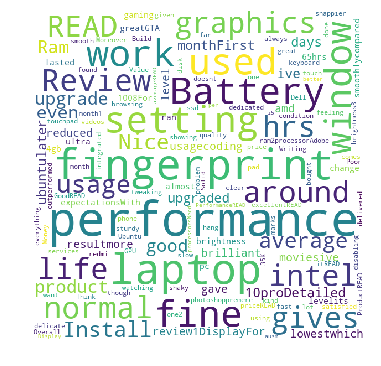

In [24]:
#WORD CLOUD
from wordcloud import WordCloud
comment_words = ' '
for words in t: 
    comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 600, height = 600, 
                background_color='white' , 
                stopwords = stop, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [25]:
#SENTIMENT ANALYSIS
from textblob import TextBlob

In [26]:
for i in range(len(text['text'])):
    se=TextBlob(text['text'][i])
    print(se.sentiment)

Sentiment(polarity=0.35000000000000003, subjectivity=0.6833333333333332)
Sentiment(polarity=0.11190476190476188, subjectivity=0.6214285714285713)
Sentiment(polarity=0.3416666666666667, subjectivity=0.59375)
Sentiment(polarity=-0.09999999999999999, subjectivity=0.4611111111111111)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.37, subjectivity=0.72)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.5, subjectivity=0.5)


In [27]:
b = []
for i in range(len(text['text'])):
    se=TextBlob(text['text'][i])
    print(se.sentiment)
    if se.sentiment.polarity > 0: 
        b.append(1)
    elif se.sentiment.polarity == 0: 
         b.append(2)
    else: 
         b.append(3)
text['sentiment']=b
text.head()

Sentiment(polarity=0.35000000000000003, subjectivity=0.6833333333333332)
Sentiment(polarity=0.11190476190476188, subjectivity=0.6214285714285713)
Sentiment(polarity=0.3416666666666667, subjectivity=0.59375)
Sentiment(polarity=-0.09999999999999999, subjectivity=0.4611111111111111)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.37, subjectivity=0.72)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.5, subjectivity=0.5)


,text,word_count,char_count,avg_word,stopwords,stem,sentiment
0,Review monthFirst day ive used ubuntulater upg...,68,498,6.338235,22,review monthfirst day ive use ubuntulat upgrad...,1
1,Writing review using 1 month1 Build quality fi...,89,506,4.696629,27,write review use 1 month1 build qualiti fine k...,1
2,Nice laptop 35K Ubuntu slow one fingerprint do...,55,305,4.563636,21,nice laptop 35k ubuntu slow one fingerprint do...,1
3,Poor performance even though dedicated GPU int...,37,239,5.486486,11,poor perform even though dedic gpu intel integ...,3
4,Value For Money ProductREAD,5,32,5.600000,0,valu for money productread,2


In [28]:
ps=0
for i in range(len(text['sentiment'])): 
     if (text['sentiment'][i] ==1):
        ps = ps+1 
print("Positive tweets percentage: {} %".format(100*ps/len(text['sentiment'])))
ns=0
for i in range(len(text['sentiment'])): 
     if (text['sentiment'][i] ==3):
        ns = ns+1 
print("Negative tweets percentage: {} %".format(100*ns/len(text['sentiment'])))
print("Neutral tweets percentage: {} % ".format(100*(len(text['sentiment']) - ns - ps)/len(text['sentiment'])))

Positive tweets percentage: 55.55555555555556 %
Negative tweets percentage: 11.11111111111111 %
Neutral tweets percentage: 33.333333333333336 % 


In [41]:
#Using MonkeyLearn
from monkeylearn import MonkeyLearn
from monkeylearn.exceptions import PlanQueryLimitError, MonkeyLearnException
ml = MonkeyLearn('7cf596afbe22f32ca0a88479f5731feeba294f30')
res = ml.classifiers.list(page=2, per_page=10, order_by=['-is_public', 'name'])
for i in range(len(res.body)):
    print(res.body[i])

{'id': 'cl_TKb7XmdG', 'name': 'Hotel Aspect', 'description': 'Classify hotel reviews and comments according to the aspects or topics mentioned.', 'is_public': True, 'model_version': 'v3.0', 'created': '2016-04-28T17:14:05+00:00', 'industries': ['other'], 'priority': 1, 'last_trained': '2018-07-23T19:48:58.167442+00:00'}
{'id': 'cl_LD3be9HJ', 'name': 'Hotel Sentiment', 'description': 'Positive/negative sentiment analysis trained over TripAdvisor hotel reviews.', 'is_public': True, 'model_version': 'v3.0', 'created': '2016-04-21T17:17:01+00:00', 'industries': ['web_scraping'], 'priority': 1, 'last_trained': '2018-05-28T14:17:12+00:00'}
{'id': 'cl_Vay9jh28', 'name': 'Language Classifier', 'description': 'Detect language in text. Classify into 49 different languages arranged in language families. This classifier works at a character level.', 'is_public': True, 'model_version': 'v3.0', 'created': '2018-09-25T20:30:20+00:00', 'industries': ['other'], 'priority': 8, 'last_trained': '2018-10-0

In [42]:
try:
    response = ml.classifiers.classify('cl_TWmMTdgQ', data=tex)
except PlanQueryLimitError as e:
    # No monthly queries left
    # e.response contains the MonkeyLearnResponse object
    print(e.error_code, e.detail)
except MonkeyLearnException:
    raise

In [44]:
for i in range(len(response.body)):
    print(response.body[i]['classifications'])
    

[{'tag_name': 'Positive', 'tag_id': 58825235, 'confidence': 0.896}]
[{'tag_name': 'Positive', 'tag_id': 58825235, 'confidence': 0.78}]
[{'tag_name': 'Positive', 'tag_id': 58825235, 'confidence': 0.577}]
[{'tag_name': 'Negative', 'tag_id': 58825234, 'confidence': 0.526}]
[{'tag_name': 'Positive', 'tag_id': 58825235, 'confidence': 0.712}]
[{'tag_name': 'Positive', 'tag_id': 58825235, 'confidence': 0.869}]
[{'tag_name': 'Positive', 'tag_id': 58825235, 'confidence': 0.989}]
[{'tag_name': 'Positive', 'tag_id': 58825235, 'confidence': 0.967}]
[{'tag_name': 'Positive', 'tag_id': 58825235, 'confidence': 0.737}]
